#  Text Classification and Processing using NLTK and Sentiment Analysis

In [35]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings("ignore")

# Load the dataset
df=pd.read_csv('C:/Users/RUPA/Downloads/file.tsv',sep="\t")

In [3]:
pip install imblearn


Note: you may need to restart the kernel to use updated packages.


In [36]:
df.head(5)

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [4]:
from imblearn.over_sampling import SMOTE

In [5]:
# convert date into appropirate format
df['date']=pd.to_datetime(df['date']) 
# display info of data
df.info() 
# add new col length of the reviews.
df['length']=len(df['verified_reviews'])
df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
rating              3150 non-null int64
date                3150 non-null datetime64[ns]
variation           3150 non-null object
verified_reviews    3150 non-null object
feedback            3150 non-null int64
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 123.1+ KB


,rating,date,variation,verified_reviews,feedback,length
0,5,2018-07-31,Charcoal Fabric,Love my Echo!,1,3150
1,5,2018-07-31,Charcoal Fabric,Loved it!,1,3150
2,4,2018-07-31,Walnut Finish,"Sometimes while playing a game, you can answer...",1,3150
3,5,2018-07-31,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,3150
4,5,2018-07-31,Charcoal Fabric,Music,1,3150


## rating vs feedback for all the variations of the product

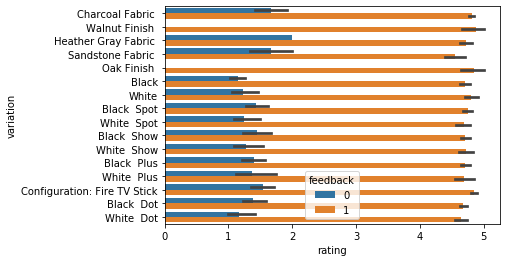

In [37]:
# 
sns.barplot( x = 'rating',y = "variation",hue = 'feedback',data = df)

## product rating vs feedback

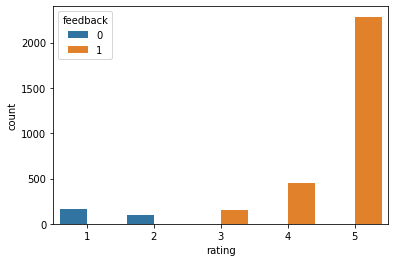

In [7]:
 sns.countplot(x = 'rating', hue = 'feedback' , data = df)

## Processing of reviews using NLTK and stemming of data.

In [8]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [11]:
corpus=[]
for i in range(0,3150):
    # retain alphabets
    review=re.sub('[^a-zA-Z]', ' ', df['verified_reviews'][i] )
    # convert to lower case
    review=review.lower()
    # tokenize
    review=review.split()
    # initialize stemmer object
    
    ps=PorterStemmer()
    # perform stemming
    review=[ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    # join elements of list
    review=' '.join(review)
    # add to 'corpus'
    corpus.append(review)
    

In [60]:

str=''.join(corpus)


## wordcloud

200


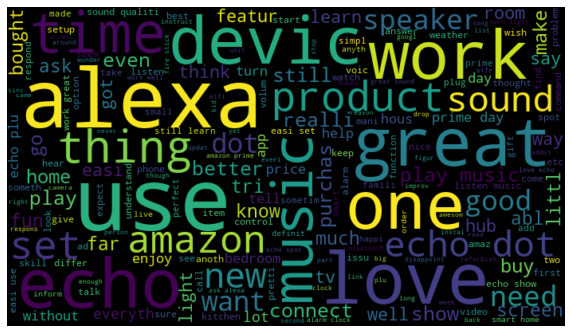

In [63]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


# generate wordcloud object
wordcloud=WordCloud(width=700, height=400, random_state=21, max_font_size=110).generate(str)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
print(len(wordcloud.words_))

## splitting of data

In [51]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

In [13]:
cv=CountVectorizer(max_features=1500)
X=cv.fit_transform(corpus)
y=df['feedback'].copy()
count=y.value_counts()


In [14]:
#split the data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [16]:
# import packages
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score

# Instantiate calssifier

rf=RandomForestClassifier(random_state=2)
# fit model on training data
rf.fit(X_train,y_train)

# predict on test data
y_pred=rf.predict(X_test)


# # calculate the accuracy score
score=accuracy_score(y_pred,y_test)

# # calculate the precision
precision=precision_score(y_pred,y_test)

# # display 'score' and 'precision'


In [17]:
print(round(precision,2),round(score,2))

0.99 0.94


In [21]:


# Instantiate smote
smote=SMOTE(random_state=9)

# fit_sample onm training data
X_res,y_res=smote.fit_resample(X_train,y_train)

# fit modelk on training data

rf.fit(X_train,y_train)
# predict on test data
y_pred=rf.predict(X_test)

# calculate the accuracy sco
ascore=accuracy_score(y_pred,y_test)
aprecision=precision_score(y_pred,y_test)

In [23]:
ascore
aprecision

0.9947916666666666

## Sentiment analysis with TextBlob

In [65]:
!pip install textblob
from textblob import TextBlob

In [86]:
nltk.download('averaged_perceptron_tagger')
  

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\RUPA\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


True

In [87]:
text=TextBlob(df['verified_reviews'][6])
text

TextBlob("Without having a cellphone, I cannot use many of her features. I have an iPad but do not see that of any use.  It IS a great alarm.  If u r almost deaf, you can hear her alarm in the bedroom from out in the living room, so that is reason enough to keep her.It is fun to ask random questions to hear her response.  She does not seem to be very smartbon politics yet.")

In [89]:
tags=text.tags
tags

[('Without', 'IN'),
 ('having', 'VBG'),
 ('a', 'DT'),
 ('cellphone', 'NN'),
 ('I', 'PRP'),
 ('can', 'MD'),
 ('not', 'RB'),
 ('use', 'VB'),
 ('many', 'JJ'),
 ('of', 'IN'),
 ('her', 'PRP$'),
 ('features', 'NNS'),
 ('I', 'PRP'),
 ('have', 'VBP'),
 ('an', 'DT'),
 ('iPad', 'NN'),
 ('but', 'CC'),
 ('do', 'VBP'),
 ('not', 'RB'),
 ('see', 'VB'),
 ('that', 'IN'),
 ('of', 'IN'),
 ('any', 'DT'),
 ('use', 'NN'),
 ('It', 'PRP'),
 ('IS', 'VBZ'),
 ('a', 'DT'),
 ('great', 'JJ'),
 ('alarm', 'NN'),
 ('If', 'IN'),
 ('u', 'JJ'),
 ('r', 'NN'),
 ('almost', 'RB'),
 ('deaf', 'NN'),
 ('you', 'PRP'),
 ('can', 'MD'),
 ('hear', 'VB'),
 ('her', 'PRP$'),
 ('alarm', 'NN'),
 ('in', 'IN'),
 ('the', 'DT'),
 ('bedroom', 'NN'),
 ('from', 'IN'),
 ('out', 'IN'),
 ('in', 'IN'),
 ('the', 'DT'),
 ('living', 'NN'),
 ('room', 'NN'),
 ('so', 'IN'),
 ('that', 'DT'),
 ('is', 'VBZ'),
 ('reason', 'NN'),
 ('enough', 'JJ'),
 ('to', 'TO'),
 ('keep', 'VB'),
 ('her.It', 'NN'),
 ('is', 'VBZ'),
 ('fun', 'VBN'),
 ('to', 'TO'),
 ('ask', 'VB'

In [91]:
token=text.words
print(token)

['Without', 'having', 'a', 'cellphone', 'I', 'can', 'not', 'use', 'many', 'of', 'her', 'features', 'I', 'have', 'an', 'iPad', 'but', 'do', 'not', 'see', 'that', 'of', 'any', 'use', 'It', 'IS', 'a', 'great', 'alarm', 'If', 'u', 'r', 'almost', 'deaf', 'you', 'can', 'hear', 'her', 'alarm', 'in', 'the', 'bedroom', 'from', 'out', 'in', 'the', 'living', 'room', 'so', 'that', 'is', 'reason', 'enough', 'to', 'keep', 'her.It', 'is', 'fun', 'to', 'ask', 'random', 'questions', 'to', 'hear', 'her', 'response', 'She', 'does', 'not', 'seem', 'to', 'be', 'very', 'smartbon', 'politics', 'yet']


#lemmatize every word
 lemmas=[Word(i).lemmatize()for i in text.words]
print(lemmas)

### Sentiment(polarity=float,subjectivity=float)
    Polarity score is a float within the range [-1.0, 1.0] with negative values corresponding to negative sentiments and     positive values to positive sentiments
    Subjectivity is a float within the range [0.0, 1.0] where 0.0 is very objective and 1.0 is very subjective

In [94]:
text.sentiment

Sentiment(polarity=0.21666666666666667, subjectivity=0.4583333333333333)

In [109]:
#for all reviews
tb_polarity=[]
tb_subjectivity=[]
# loop over tweets
for sentence in df['verified_reviews']:
    temp=TextBlob(sentence)
    tb_polarity=temp.sentiment[0]
    tb_subjectivity=temp.sentiment[1]

df['tb_polarity']=tb_polarity
df['tb_subjectivity']=tb_subjectivity

In [112]:
# print(df['tb_polarity'])
# print(df['tb_subjectivity'])